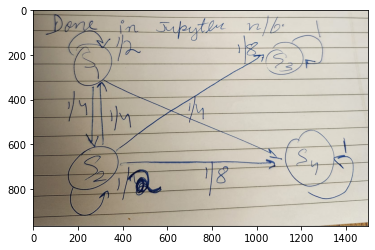

In [6]:
import matplotlib.pyplot as plt
pic=plt.imread('math444pic3jpg.jpg')
plt.imshow(pic)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the Transition Matrix for the new Markov chain
transition_matrix = np.array([
    [1/2, 1/4, 0, 0],
    [1/4, 1/2, 0, 0],
    [0, 1/8, 1, 0],
    [1/4, 1/8, 0, 1]
])

# Function to enhance the quality of the input image and save it
def enhance_image(input_path='math444pic3jpg.jpg', output_path='markov_chain_diagram.jpg'):
    img = Image.open(input_path)
    img = img.convert("RGB").resize((img.width * 2, img.height * 2), Image.ANTIALIAS)
    img.save(output_path)
    print(f"Enhanced image saved as '{output_path}'.")

# Function to simulate the random walk
def random_walk(transition_matrix, start, n_steps):
    state = start
    visits = np.zeros(4)  # Keep track of visits to each state
    for _ in range(n_steps):
        visits[state - 1] += 1  # Count visit to the current state
        state = np.random.choice(range(1, 5), p=transition_matrix[:, state - 1])
    return visits

# Function to simulate the long-term distribution based on multiple cycles with weighted average
def simulate_weighted_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=20000):
    all_distributions = np.zeros((cycles, 4))  # Store distributions for each cycle

    # Define weights; for instance, we can use a simple linear decay or any other strategy
    weights = np.linspace(1, 2, cycles)  # Example weights: linearly increasing from 1 to 2

    for cycle in range(cycles):
        visits = random_walk(transition_matrix, np.random.choice(range(1, 5), p=start_distribution), n_steps)
        all_distributions[cycle] = visits / n_steps  # Normalize visits to get distribution

    # Calculate the weighted average
    weighted_sum = np.sum(all_distributions * weights[:, np.newaxis], axis=0)
    total_weight = np.sum(weights)
    weighted_average_distribution = weighted_sum / total_weight  # Normalize by total weight

    return weighted_average_distribution  # Return the weighted average distribution

# Function to calculate the probability distribution after n steps
def probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps):
    # Normalize the initial state vector to ensure it sums to 1
    start_distribution = start_distribution / np.sum(start_distribution)

    # Raise the transition matrix to the power of n_steps
    transition_matrix_n_steps = np.linalg.matrix_power(transition_matrix, n_steps)

    # Calculate the distribution after n steps using X(n) = A^n * X(0)
    new_distribution = transition_matrix_n_steps @ start_distribution  # Matrix multiplication

    return new_distribution  # Return the new distribution directly

# Visualize the long-term distribution as a bar graph
def visualize_long_term_distribution(long_term_distribution):
    states = [f"State {i + 1}" for i in range(4)]  # Adjusted for 4 states
    plt.bar(states, long_term_distribution, color='blue', alpha=0.7)

    highest_prob_state = np.argmax(long_term_distribution) + 1
    highest_prob_value = long_term_distribution[highest_prob_state - 1]

    print(f"The state with the highest long-term probability is State {highest_prob_state} with a probability of {highest_prob_value:.4f}.")

    plt.title("Long-Term Distribution of States")
    plt.ylabel("Probability")
    plt.xlabel("States")
    plt.ylim(0, 1)  # Probability should be between 0 and 1
    plt.show()

# Main program to interact with the user
def main():
    # Enhance and save the image
    enhance_image()

    # User chooses whether to pick a starting point or random
    choice = input("Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): ")
    if choice == '1':
        start = int(input("Choose a starting point (1-4): "))
        if start < 1 or start > 4:
            print("Invalid starting point, defaulting to 1.")
            start = 1
        start_distribution = np.zeros(4)
        start_distribution[start - 1] = 1  # Uniform distribution at the chosen start
    elif choice == '2':
        start_vector = input("Enter a custom initial state vector (comma-separated probabilities for states 1-4): ")
        start_distribution = np.array([float(x) for x in start_vector.split(",")])
        if np.sum(start_distribution) != 1 or len(start_distribution) != 4:
            print("Invalid input. Defaulting to uniform distribution.")
            start_distribution = np.array([0.25, 0.25, 0.25, 0.25])
    else:
        # Randomly choose a starting state and create the initial state vector
        start = random.choice(range(1, 5))  # Randomly choose between states 1-4
        start_distribution = np.zeros(4)
        start_distribution[start - 1] = 1  # Set the chosen state to 1, others to 0
        print(f"Randomly chosen starting point: State {start}")

    # User inputs the number of steps
    n_steps = int(input("Enter the number of steps: "))
    print(f"Number of steps: {n_steps}")

    # Calculate and print the probability distribution after n steps
    prob_dist_n_steps = probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps)
    print("Probability distribution after", n_steps, "steps:", prob_dist_n_steps)

    # Simulate the weighted long-term distributio
    print("Calculating weighted long-term distribution...")
    weighted_long_term_distribution = simulate_weighted_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=20000)
    print("Weighted long-term distribution starting from custom distribution:", weighted_long_term_distribution)

    # Visualize the weighted long-term distribution
    visualize_long_term_distribution(weighted_long_term_distribution)

# Run the main function
if __name__ == "__main__":
    main()

Enhanced image saved as 'markov_chain_diagram.jpg'.


Enhanced image saved as 'markov_chain_diagram.jpg'.
Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): 1
Choose a starting point (1-4): 4
Enter the number of steps: 200
Number of steps: 200
Path taken in the random walk: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Probability distribution after 200 steps: [0. 0. 0. 1.]
Calculating long-term distribution without weig

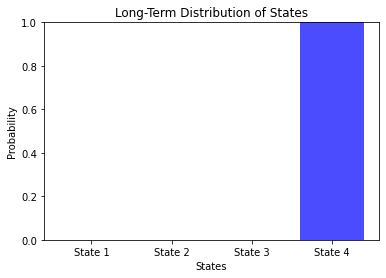

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the Transition Matrix for the Markov chain
transition_matrix = np.array([
    [1/2, 1/4, 0, 0],
    [1/4, 1/2, 0, 0],
    [0, 1/8, 1, 0],
    [1/4, 1/8, 0, 1]
])

# Function to enhance the quality of the input image and save it
def enhance_image(input_path='math444pic3jpg.jpg', output_path='markov_chain_diagram.jpg'):
    img = Image.open(input_path)
    img = img.convert("RGB").resize((img.width * 2, img.height * 2), Image.ANTIALIAS)
    img.save(output_path)
    print(f"Enhanced image saved as '{output_path}'.")

# Function to simulate the random walk
def random_walk(transition_matrix, start, n_steps):
    state = start
    visits = np.zeros(4)  # Keep track of visits to each state
    for _ in range(n_steps):
        visits[state - 1] += 1  # Count visit to the current state
        state = np.random.choice(range(1, 5), p=transition_matrix[:, state - 1])
    return visits

# Function to print the path taken in the random walk
def print_random_walk_path(transition_matrix, start, n_steps):
    state = start
    path = [state]  # Start path with the initial state
    for _ in range(n_steps):
        state = np.random.choice(range(1, 5), p=transition_matrix[:, state - 1])
        path.append(state)
    print("Path taken in the random walk:", path)

# Function to simulate the long-term distribution based on multiple cycles without weights
def simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=20000):
    all_distributions = np.zeros((cycles, 4))  # Store distributions for each cycle

    for cycle in range(cycles):
        visits = random_walk(transition_matrix, np.random.choice(range(1, 5), p=start_distribution), n_steps)
        all_distributions[cycle] = visits / n_steps  # Normalize visits to get distribution

    average_distribution = np.mean(all_distributions, axis=0)  # Calculate average distribution across cycles

    return average_distribution

# Function to calculate the probability distribution after n steps
def probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps):
    start_distribution = start_distribution / np.sum(start_distribution)
    transition_matrix_n_steps = np.linalg.matrix_power(transition_matrix, n_steps)
    new_distribution = transition_matrix_n_steps @ start_distribution
    return new_distribution

# Visualize the long-term distribution as a bar graph
def visualize_long_term_distribution(long_term_distribution):
    states = [f"State {i + 1}" for i in range(4)]
    plt.bar(states, long_term_distribution, color='blue', alpha=0.7)
    highest_prob_state = np.argmax(long_term_distribution) + 1
    highest_prob_value = long_term_distribution[highest_prob_state - 1]
    print(f"The state with the highest long-term probability is State {highest_prob_state} with a probability of {highest_prob_value:.4f}.")
    plt.title("Long-Term Distribution of States")
    plt.ylabel("Probability")
    plt.xlabel("States")
    plt.ylim(0, 1)
    plt.show()

# Main program to interact with the user
def main():
    # Enhance and save the image
    enhance_image()

    # User chooses whether to pick a starting point or random
    choice = input("Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): ")
    if choice == '1':
        start = int(input("Choose a starting point (1-4): "))
        if start < 1 or start > 4:
            print("Invalid starting point, defaulting to 1.")
            start = 1
        start_distribution = np.zeros(4)
        start_distribution[start - 1] = 1
    elif choice == '2':
        start_vector = input("Enter a custom initial state vector (comma-separated probabilities for states 1-4): ")
        start_distribution = np.array([float(x) for x in start_vector.split(",")])
        if np.sum(start_distribution) != 1 or len(start_distribution) != 4:
            print("Invalid input. Defaulting to uniform distribution.")
            start_distribution = np.array([0.25, 0.25, 0.25, 0.25])
    else:
        start = random.choice(range(1, 5))
        start_distribution = np.zeros(4)
        start_distribution[start - 1] = 1
        print(f"Randomly chosen starting point: State {start}")

    # User inputs the number of steps
    n_steps = int(input("Enter the number of steps: "))
    print(f"Number of steps: {n_steps}")

    # Print the random walk path
    print_random_walk_path(transition_matrix, start, n_steps)

    # Calculate and print the probability distribution after n steps
    prob_dist_n_steps = probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps)
    print("Probability distribution after", n_steps, "steps:", prob_dist_n_steps)

    # Simulate the long-term distribution without weights
    print("Calculating long-term distribution without weights...")
    long_term_distribution = simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=20000)
    print("Long-term distribution starting from custom distribution:", long_term_distribution)

    # Visualize the long-term distribution
    visualize_long_term_distribution(long_term_distribution)

# Run the main function
if __name__ == "__main__":
    main()